In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c flight-delays-fall-2018

Saving kaggle.json to kaggle.json
  0% 0.00/2.42M [00:00<?, ?B/s]
100% 2.42M/2.42M [00:00<00:00, 1.07GB/s]


In [3]:
!unzip /content/flight-delays-fall-2018.zip -d /content/
!unzip /content/flight_delays_test.csv.zip -d /content/
!unzip /content/flight_delays_train.csv.zip -d /content/
!unzip /content/sample_submission.csv.zip -d /content/

Archive:  /content/flight-delays-fall-2018.zip
  inflating: /content/flight_delays_test.csv.zip  
  inflating: /content/flight_delays_train.csv.zip  
  inflating: /content/sample_submission.csv.zip  
Archive:  /content/flight_delays_test.csv.zip
  inflating: /content/flight_delays_test.csv  
Archive:  /content/flight_delays_train.csv.zip
  inflating: /content/flight_delays_train.csv  
Archive:  /content/sample_submission.csv.zip
  inflating: /content/sample_submission.csv  


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('./flight_delays_train.csv')
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [6]:
df.shape

(100000, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  object
 1   DayofMonth         100000 non-null  object
 2   DayOfWeek          100000 non-null  object
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      100000 non-null  object
 5   Origin             100000 non-null  object
 6   Dest               100000 non-null  object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


In [8]:
df.describe()

,DepTime,Distance
count,100000.000000,100000.00000
mean,1341.523880,729.39716
std,476.378445,574.61686
min,1.000000,30.00000
25%,931.000000,317.00000
50%,1330.000000,575.00000
75%,1733.000000,957.00000
max,2534.000000,4962.00000


In [9]:
import seaborn as sns

<Axes: ylabel='DepTime'>

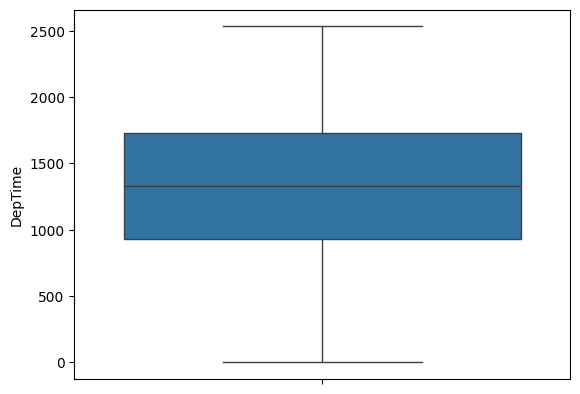

In [10]:
sns.boxplot(df['DepTime'])

<Axes: ylabel='Distance'>

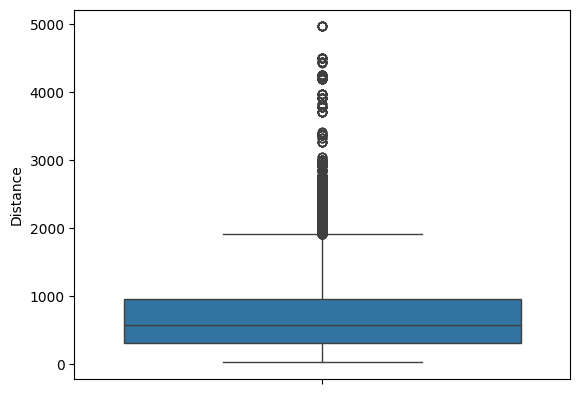

In [11]:
sns.boxplot(df['Distance'])

In [12]:
df1 = df.copy()
df1[df1['Distance'] > df1['Distance'].quantile(0.99)].shape

(999, 9)

In [13]:
# df[df['Distance'] < 2000]['dep_delayed_15min'].value_counts()
df1 = df1[df1['Distance'] <= df1['Distance'].quantile(0.99)]
df1.shape

(99001, 9)

In [14]:
df1.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [15]:
def convert_date(df:pd.DataFrame)->pd.DataFrame:
  for col in ['Month', 'DayofMonth', 'DayOfWeek']:
    df[col] = df[col].apply(lambda x: int(x.split('-')[1]))
  return df

In [16]:
df2 = df1.copy()
df2 = convert_date(df2)
df2.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,N
1,4,20,3,1548,US,PIT,MCO,834,N
2,9,2,5,1422,XE,RDU,CLE,416,N
3,11,25,6,1015,OO,DEN,MEM,872,N
4,10,7,6,1828,WN,MDW,OMA,423,Y


In [17]:
df2['dep_delayed_15min'] = df2['dep_delayed_15min'].apply(lambda x: 1 if x == 'Y' else 0)
df2.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,0
1,4,20,3,1548,US,PIT,MCO,834,0
2,9,2,5,1422,XE,RDU,CLE,416,0
3,11,25,6,1015,OO,DEN,MEM,872,0
4,10,7,6,1828,WN,MDW,OMA,423,1


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99001 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              99001 non-null  int64 
 1   DayofMonth         99001 non-null  int64 
 2   DayOfWeek          99001 non-null  int64 
 3   DepTime            99001 non-null  int64 
 4   UniqueCarrier      99001 non-null  object
 5   Origin             99001 non-null  object
 6   Dest               99001 non-null  object
 7   Distance           99001 non-null  int64 
 8   dep_delayed_15min  99001 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 7.6+ MB


In [19]:
df2['UniqueCarrier'].value_counts()

,count
UniqueCarrier,
WN,15082
AA,9186
DL,8020
MQ,7443
OO,7390
UA,6671
US,6453
NW,6346
XE,5901


In [20]:
df2['Origin'].value_counts().head(50)

,count
Origin,
ATL,5818
ORD,4845
DFW,4254
LAX,3208
IAH,3034
DEN,2964
PHX,2701
LAS,2490
CVG,2342


In [21]:
def convert_unique_carrier(df:pd.DataFrame)->pd.DataFrame:
  unique_carrier_counts = df2['UniqueCarrier'].value_counts()
  for carrier in unique_carrier_counts.index:
    if unique_carrier_counts[carrier] < 1000:
      df['UniqueCarrier'] = df['UniqueCarrier'].apply(lambda x: 'Other' if x == carrier else x)
  return df

In [22]:
df3 = convert_unique_carrier(df2)
df3.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,0
1,4,20,3,1548,US,PIT,MCO,834,0
2,9,2,5,1422,XE,RDU,CLE,416,0
3,11,25,6,1015,OO,DEN,MEM,872,0
4,10,7,6,1828,WN,MDW,OMA,423,1


In [23]:
unique_carrier_col = df3['UniqueCarrier'].unique()
unique_carrier_col

array(['AA', 'US', 'XE', 'OO', 'WN', 'NW', 'DL', 'OH', 'AS', 'UA', 'MQ',
       'CO', 'EV', 'Other', 'YV', 'F9', 'HP', 'B6', 'FL'], dtype=object)

In [24]:
pd.get_dummies(df3['UniqueCarrier'])

,AA,AS,B6,CO,DL,EV,F9,FL,HP,MQ,NW,OH,OO,Other,UA,US,WN,XE,YV
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
99996,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [25]:
df3 = pd.concat([df3, pd.get_dummies(df3['UniqueCarrier'])], axis=1)
df3 = df3.drop(['UniqueCarrier'], axis=1)
df3.head()

,Month,DayofMonth,DayOfWeek,DepTime,Origin,Dest,Distance,dep_delayed_15min,AA,AS,...,MQ,NW,OH,OO,Other,UA,US,WN,XE,YV
0,8,21,7,1934,ATL,DFW,732,0,True,False,...,False,False,False,False,False,False,False,False,False,False
1,4,20,3,1548,PIT,MCO,834,0,False,False,...,False,False,False,False,False,False,True,False,False,False
2,9,2,5,1422,RDU,CLE,416,0,False,False,...,False,False,False,False,False,False,False,False,True,False
3,11,25,6,1015,DEN,MEM,872,0,False,False,...,False,False,False,True,False,False,False,False,False,False
4,10,7,6,1828,MDW,OMA,423,1,False,False,...,False,False,False,False,False,False,False,True,False,False


In [26]:
df3 = df3.drop(['Other'], axis=1)
df3.head()

,Month,DayofMonth,DayOfWeek,DepTime,Origin,Dest,Distance,dep_delayed_15min,AA,AS,...,HP,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,8,21,7,1934,ATL,DFW,732,0,True,False,...,False,False,False,False,False,False,False,False,False,False
1,4,20,3,1548,PIT,MCO,834,0,False,False,...,False,False,False,False,False,False,True,False,False,False
2,9,2,5,1422,RDU,CLE,416,0,False,False,...,False,False,False,False,False,False,False,False,True,False
3,11,25,6,1015,DEN,MEM,872,0,False,False,...,False,False,False,False,True,False,False,False,False,False
4,10,7,6,1828,MDW,OMA,423,1,False,False,...,False,False,False,False,False,False,False,True,False,False


In [27]:
# target guided ordinal rank
origin_rank = df2.groupby('Origin')['dep_delayed_15min'].mean().rank(method='dense', ascending=True).astype(int).to_dict()
dest_rank = df2.groupby('Dest')['dep_delayed_15min'].mean().rank(method='dense', ascending=True).astype(int).to_dict()
df3['Origin'] = df3['Origin'].map(origin_rank)
df3['Dest'] = df3['Dest'].map(dest_rank)
df3.head()

,Month,DayofMonth,DayOfWeek,DepTime,Origin,Dest,Distance,dep_delayed_15min,AA,AS,...,HP,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,8,21,7,1934,189,41,732,0,True,False,...,False,False,False,False,False,False,False,False,False,False
1,4,20,3,1548,105,79,834,0,False,False,...,False,False,False,False,False,False,True,False,False,False
2,9,2,5,1422,120,69,416,0,False,False,...,False,False,False,False,False,False,False,False,True,False
3,11,25,6,1015,135,39,872,0,False,False,...,False,False,False,False,True,False,False,False,False,False
4,10,7,6,1828,188,176,423,1,False,False,...,False,False,False,False,False,False,False,True,False,False


In [28]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

In [29]:
# # columns_to_encode = ['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier']
# columns_to_encode = ['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier']
# onehotencoder = ColumnTransformer(
#     transformers=[
#       ('onehot', OneHotEncoder(sparse_output=False, drop='first',  handle_unknown='ignore'), columns_to_encode)
#   ],
#   remainder='passthrough'
# )

# y = df1['dep_delayed_15min']
# df1 = df1.drop(['dep_delayed_15min'], axis=1)
# df2_array = onehotencoder.fit_transform(df1)
# test_df_array = onehotencoder.transform(test_df)
# new_cols = onehotencoder.named_transformers_['onehot'].get_feature_names_out(columns_to_encode)
# rem_cols = [col for col in df1.columns if col not in columns_to_encode]
# final_cols = list(new_cols) + rem_cols
# df2 = pd.DataFrame(df2_array, columns=final_cols)
# test_df_processed = pd.DataFrame(test_df_array, columns=final_cols)
# df1.shape
df3['DepTime'].describe()

,DepTime
count,99001.000000
mean,1340.762578
std,475.971045
min,1.000000
25%,931.000000
50%,1329.000000
75%,1732.000000
max,2534.000000


In [30]:
# Check if any hour > 23 or minute > 59
invalid_times = df3[(df3['DepTime'] // 100 > 23) | (df3['DepTime'] % 100 > 59)]
invalid_times.shape

(29, 26)

In [31]:
df3 = df3.drop(invalid_times.index)
df3.shape

(98972, 26)

In [42]:
df3.head()

,Month,DayofMonth,DayOfWeek,DepTime,Origin,Dest,Distance,dep_delayed_15min,AA,AS,...,HP,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,8,21,7,1934,189,41,732,0,True,False,...,False,False,False,False,False,False,False,False,False,False
1,4,20,3,1548,105,79,834,0,False,False,...,False,False,False,False,False,False,True,False,False,False
2,9,2,5,1422,120,69,416,0,False,False,...,False,False,False,False,False,False,False,False,True,False
3,11,25,6,1015,135,39,872,0,False,False,...,False,False,False,False,True,False,False,False,False,False
4,10,7,6,1828,188,176,423,1,False,False,...,False,False,False,False,False,False,False,True,False,False


In [33]:
y = df3['dep_delayed_15min']
# y = y.apply(lambda x: 1 if x == 'Y' else 0)

In [34]:
# X = df2.drop(['Origin', 'Dest',], axis=1)
# X = X.apply(pd.to_numeric)
X = df3.drop(['dep_delayed_15min'], axis=1)
# y = df2['dep_delayed_15min']
X.shape, y.shape

((98972, 25), (98972,))

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df3.drop('dep_delayed_15min', axis=1))

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [37]:
# from sklearn.svm import SVC

# model = SVC()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [85]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8258145996463754

In [39]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8110633998484466

In [40]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [41]:
# test_df_processed.head()
test_df = pd.read_csv('./flight_delays_test.csv')
test_df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-7,c-25,c-3,615,YV,MRY,PHX,598
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577
3,c-3,c-25,c-7,1614,WN,BWI,MHT,377
4,c-6,c-6,c-3,1505,UA,ORD,STL,258


In [49]:
df3.head()

,Month,DayofMonth,DayOfWeek,DepTime,Origin,Dest,Distance,dep_delayed_15min,AA,AS,...,HP,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,8,21,7,1934,189,41,732,0,True,False,...,False,False,False,False,False,False,False,False,False,False
1,4,20,3,1548,105,79,834,0,False,False,...,False,False,False,False,False,False,True,False,False,False
2,9,2,5,1422,120,69,416,0,False,False,...,False,False,False,False,False,False,False,False,True,False
3,11,25,6,1015,135,39,872,0,False,False,...,False,False,False,False,True,False,False,False,False,False
4,10,7,6,1828,188,176,423,1,False,False,...,False,False,False,False,False,False,False,True,False,False


In [48]:
test_df = convert_date(test_df)
test_df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,7,25,3,615,YV,MRY,PHX,598
1,4,17,2,739,WN,LAS,HOU,1235
2,12,2,7,651,MQ,GSP,ORD,577
3,3,25,7,1614,WN,BWI,MHT,377
4,6,6,3,1505,UA,ORD,STL,258


In [57]:
test_carrier_dummies = pd.get_dummies(test_df['UniqueCarrier'])

test_carrier_dummies = test_carrier_dummies.reindex(columns=unique_carrier_col, fill_value=0)

test_df1 = test_df.drop(['UniqueCarrier'], axis=1)
test_df1 = pd.concat([test_df1, test_carrier_dummies.drop(["Other"], axis=1)], axis=1)

test_df1.head()

,Month,DayofMonth,DayOfWeek,DepTime,Origin,Dest,Distance,AA,US,XE,...,AS,UA,MQ,CO,EV,YV,F9,HP,B6,FL
0,7,25,3,615,MRY,PHX,598,False,False,False,...,False,False,False,False,False,True,False,0,False,False
1,4,17,2,739,LAS,HOU,1235,False,False,False,...,False,False,False,False,False,False,False,0,False,False
2,12,2,7,651,GSP,ORD,577,False,False,False,...,False,False,True,False,False,False,False,0,False,False
3,3,25,7,1614,BWI,MHT,377,False,False,False,...,False,False,False,False,False,False,False,0,False,False
4,6,6,3,1505,ORD,STL,258,False,False,False,...,False,True,False,False,False,False,False,0,False,False


In [60]:
set(test_df1.columns) == set(X.columns)

True

In [64]:
origin_rank

{'ABE': 39,
 'ABI': 145,
 'ABQ': 81,
 'ABY': 124,
 'ACK': 145,
 'ACT': 26,
 'ACV': 192,
 'ACY': 43,
 'ADK': 213,
 'ADQ': 209,
 'AEX': 200,
 'AGS': 204,
 'AKN': 213,
 'ALB': 64,
 'AMA': 56,
 'ANC': 168,
 'APF': 197,
 'ASE': 96,
 'ATL': 189,
 'ATW': 195,
 'AUS': 98,
 'AVL': 178,
 'AVP': 164,
 'AZO': 36,
 'BDL': 77,
 'BET': 205,
 'BFL': 167,
 'BGM': 20,
 'BGR': 48,
 'BHM': 99,
 'BIL': 26,
 'BIS': 52,
 'BLI': 205,
 'BMI': 155,
 'BNA': 111,
 'BOI': 71,
 'BOS': 142,
 'BPT': 96,
 'BQK': 1,
 'BQN': 68,
 'BRO': 5,
 'BRW': 211,
 'BTM': 12,
 'BTR': 128,
 'BTV': 65,
 'BUF': 137,
 'BUR': 91,
 'BWI': 127,
 'BZN': 119,
 'CAE': 176,
 'CAK': 163,
 'CDC': 26,
 'CDV': 21,
 'CEC': 36,
 'CHA': 84,
 'CHO': 113,
 'CHS': 133,
 'CIC': 129,
 'CID': 85,
 'CLD': 164,
 'CLE': 62,
 'CLL': 10,
 'CLT': 115,
 'CMH': 123,
 'CMI': 40,
 'COD': 113,
 'COS': 103,
 'CPR': 53,
 'CRP': 71,
 'CRW': 28,
 'CSG': 68,
 'CVG': 75,
 'CWA': 26,
 'DAB': 184,
 'DAL': 108,
 'DAY': 57,
 'DBQ': 24,
 'DCA': 54,
 'DEN': 135,
 'DFW': 159,
 '

In [67]:
test_df1['Origin'] = test_df1['Origin'].map(origin_rank)
test_df1['Dest'] = test_df1['Dest'].map(dest_rank)

In [78]:
test_df1.isna().sum()

,0
Month,0
DayofMonth,0
DayOfWeek,0
DepTime,0
Origin,99
Dest,98
Distance,0
AA,0
US,0
XE,0


In [79]:
test_df1 = test_df1.fillna(0)
test_df1['Origin'] = test_df1['Origin'].astype(int)
test_df1['Dest'] = test_df1['Dest'].astype(int)

In [80]:
test_df1.head()

,Month,DayofMonth,DayOfWeek,DepTime,Origin,Dest,Distance,AA,US,XE,...,AS,UA,MQ,CO,EV,YV,F9,HP,B6,FL
0,7,25,3,615,152,62,598,False,False,False,...,False,False,False,False,False,True,False,0,False,False
1,4,17,2,739,166,116,1235,False,False,False,...,False,False,False,False,False,False,False,0,False,False
2,12,2,7,651,140,131,577,False,False,False,...,False,False,True,False,False,False,False,0,False,False
3,3,25,7,1614,127,152,377,False,False,False,...,False,False,False,False,False,False,False,0,False,False
4,6,6,3,1505,190,104,258,False,False,False,...,False,True,False,False,False,False,False,0,False,False


In [82]:
set(test_df1.columns) == set(X.columns)

True

In [ ]:
# # final_test_df = pd.concat([test_df_processed, test_df], axis=1)
# test_df['Origin'] = test_df['Origin'].map(origin_map)
# test_df['Dest'] = test_df['Dest'].map(dest_map)
# test_df['UniqueCarrier'] = test_df['UniqueCarrier'].map(unique_carrier_map)
# test_df['Month'] = test_df['Month'].map(month_map)
# test_df['DayofMonth'] = test_df['DayofMonth'].map(dayofmonth_map)
# test_df['DayOfWeek'] = test_df['DayOfWeek'].map(dayofweek_map)
# test_df.head()

In [43]:
test_df.isna().sum()

,0
Month,0
DayofMonth,0
DayOfWeek,0
DepTime,0
UniqueCarrier,0
Origin,0
Dest,0
Distance,0


In [44]:
# test_df.fillna(0, inplace=True)

In [45]:
# test_scaled = scaler.transform(test_df)

In [46]:
# final_test_df.head()
# test_scaled

In [47]:
X.shape

(98972, 25)

In [87]:
test_df1 = test_df1[X.columns]

In [88]:
# ans = model.predict_proba(test_df_processed.drop(['Origin', 'Dest'], axis=1))
ans = model.predict_proba(test_df1)
ans

array([[0.9628096 , 0.03719036],
       [0.9666911 , 0.03330895],
       [0.91715115, 0.08284886],
       ...,
       [0.8159788 , 0.18402117],
       [0.8733877 , 0.1266123 ],
       [0.92156076, 0.07843921]], dtype=float32)

In [89]:
submission = pd.DataFrame()
submission['id'] = [i for i in range(test_df1.shape[0])]
submission['dep_delayed_15min'] = ans[:,1]

In [90]:
submission.head()

,id,dep_delayed_15min
0,0,0.037190
1,1,0.033309
2,2,0.082849
3,3,0.430261
4,4,0.227641


In [91]:
sub = pd.read_csv('./sample_submission.csv')

In [92]:
sub.head()

,id,dep_delayed_15min
0,0,0.081
1,1,0.387
2,2,0.069
3,3,0.177
4,4,0.732


In [93]:
submission.to_csv('submission.csv', index=False)